In [ ]:
data, full, packets = 'LAD', 'LAD2000', 3
# data, full, packets = 'UCF', 'UCF-Crime', 3
# data, full, packets = 'XD', 'XD-Violence', 3
dataset = f'G:\\ViolenceDetection\\Datasets\\{full}'
IMG_SIZE = 75
venv = f'C:\\Users\\cps1\\violence_project\\venv\\Violence'

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [ ]:
def load_videos(loc, max_frames=10, num_pkts=3, resize=(IMG_SIZE, IMG_SIZE), step=2):
    frames = []
    failed = 0
    for video_name in os.listdir(loc):
        video = cv2.VideoCapture(os.path.join(loc,video_name))
        frames_n = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        try:
            start = random.randint(1, frames_n-(15+num_pkts)*step)
            video.set(cv2.CAP_PROP_POS_FRAMES, start)
            new_packet = []
            i = 0
            for pkt in range(num_pkts):
#                 while len(new_packet) != max_frames:
                while video.isOpened():
                    ret, frame = video.read()
                    if not ret:
                        break
                    if i % step != 0: # Works for 30 fps videos to capture only 15 fps
                        i += 1
                        continue
                    frame = cv2.resize(frame, resize, interpolation = cv2.INTER_AREA)
                    frame = frame[:, :, [2, 1, 0]] # RGB
                    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                    new_packet.append(frame)

                    if len(new_packet) == max_frames:
                        stacked = np.array(new_packet)/255.
                        frames.append(stacked)
                        new_packet.pop(0)
                        break
                        # new_packet = np.array(new_packet)/255.
                        # frames.append(new_packet)
                        # new_packet = []
                    i+=1
        except:
            failed+=1
        finally:
            video.release()
#         if len(frames)>= limit:
#             print(video_name)
#             break

    cv2.destroyAllWindows()
    try:
        frames = np.stack(frames, axis = 0)
    except:
        pass
#     print(frames.shape, failed)
    return frames # (instances_num, max_frames, IMG_SIZE, IMG_SIZE, 3)

---

In [ ]:
def get_data(data_path, is_violent, from_split):
    t = {'n':'Non-Violent', 'v':'Violent', 'nn':'Normal'}
    violence = t[is_violent]
    data, labels, cats = [], [], []
    categories = os.listdir(f'{data_path}\\{violence}\\{from_split}')
    for i in range(len(categories)):
        cats.append(categories[i])
        cdir = f'{data_path}\\{violence}\\{from_split}\\{categories[i]}'
        cat = load_videos(cdir, max_frames=15, num_pkts=packets, resize=(IMG_SIZE, IMG_SIZE))
        if len(cat):
            data.append(cat)
        labels += [i for j in range(len(cat))]
    return data, labels, cats

def add_cats(first, second):
    return list(map(add, first, second))

In [ ]:
x_train, y_train, c = get_data(dataset, 'v', 'train')
x_test, y_test, c = get_data(dataset, 'v', 'test')
x_val, y_val, c = get_data(dataset, 'v', 'val')

In [ ]:
x_train = np.concatenate(x_train)
x_test = np.concatenate(x_test)
x_val = np.concatenate(x_val)

In [ ]:
x_train.shape, x_test.shape, x_val.shape

((2840, 15, 150, 150, 3), (655, 15, 150, 150, 3), (725, 15, 150, 150, 3))

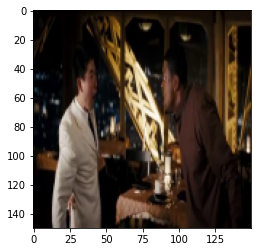

In [ ]:
plt.imshow(x_train[321][0]);

In [ ]:
classes = dict()
for i in range(len(c)):
    classes[i] = c[i]

In [ ]:
x_train_2, y_train_2, c = get_data(dataset, 'n', 'train')
x_test_2, y_test_2, c = get_data(dataset, 'n', 'test')
x_val_2, y_val_2, c = get_data(dataset, 'n', 'val')

In [ ]:
x_train_2 = np.concatenate(x_train_2)
x_test_2 = np.concatenate(x_test_2)
x_val_2 = np.concatenate(x_val_2)

In [ ]:
x_train_2.shape, x_test_2.shape, x_val_2.shape

((2238, 15, 75, 75, 3), (453, 15, 75, 75, 3), (501, 15, 75, 75, 3))

In [ ]:
x_train = np.concatenate((x_train_2,x_test_2))
x_train = np.concatenate((x_train,x_val_2))

In [ ]:
y_train = [0 for i in range(len(x_train))]

In [ ]:
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\nv_{data}_x.npy', x_train)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\nv_{data}_y.npy', y_train)

In [ ]:
x_train = np.concatenate((x_train,np.concatenate(x_train_2)))
x_test = np.concatenate((x_test,np.concatenate(x_test_2)))
x_val = np.concatenate((x_val,np.concatenate(x_val_2)))
y_train = [1 for i in range(len(x_train)-len(x_train_2))] + [0 for i in range(len(x_train_2))]
y_test = [1 for i in range(len(x_test)-len(x_test_2))] + [0 for i in range(len(x_test_2))]
y_val = [1 for i in range(len(x_val)-len(x_val_2))] + [0 for i in range(len(x_val_2))]

In [ ]:
x_train.shape, len(y_train)

((6965, 15, 150, 150, 3), 6965)

In [ ]:
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\x_train.npy', x_train)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\y_train.npy', y_train)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\x_test.npy', x_test)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\y_test.npy', y_test)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\x_val.npy', x_val)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\y_val.npy', y_val)
np.save(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\classes.npy', classes) 